In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("greenwing1985/housepricing")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housepricing


In [4]:
# prompt: # ler em dataframe os dados

import pandas as pd
import os

# Assuming the dataset contains a CSV file, find its path
csv_file_path = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file_path = os.path.join(root, file)
            break
    if csv_file_path:
        break

if csv_file_path:
    df = pd.read_csv(csv_file_path)
    print(df.head()) # Print the first few rows of the dataframe
else:
    print("No CSV file found in the downloaded dataset.")

   Area  Garage  FirePlace  Baths  White Marble  Black Marble  Indian Marble  \
0   164       2          0      2             0             1              0   
1    84       2          0      4             0             0              1   
2   190       2          4      4             1             0              0   
3    75       2          4      4             0             0              1   
4   148       1          4      2             1             0              0   

   Floors  City  Solar  Electric  Fiber  Glass Doors  Swiming Pool  Garden  \
0       0     3      1         1      1            1             0       0   
1       1     2      0         0      0            1             1       1   
2       0     2      0         0      1            0             0       0   
3       1     1      1         1      1            1             1       1   
4       1     2      1         0      0            1             1       1   

   Prices  
0   43800  
1   37550  
2   49500  
3 

In [5]:
# prompt: # me de (df .head(20) ) em uma tabela

from IPython.display import display

display(df.head(20))

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
5,124,3,3,3,0,1,0,1,1,0,0,1,1,1,1,54300
6,58,1,0,2,0,0,1,0,3,0,1,1,1,0,1,34400
7,249,2,1,1,1,0,0,1,1,0,1,0,1,1,0,50425
8,243,1,0,2,0,0,1,1,1,0,0,0,0,1,0,29575
9,242,1,2,4,0,0,1,0,2,1,0,0,0,1,0,22300


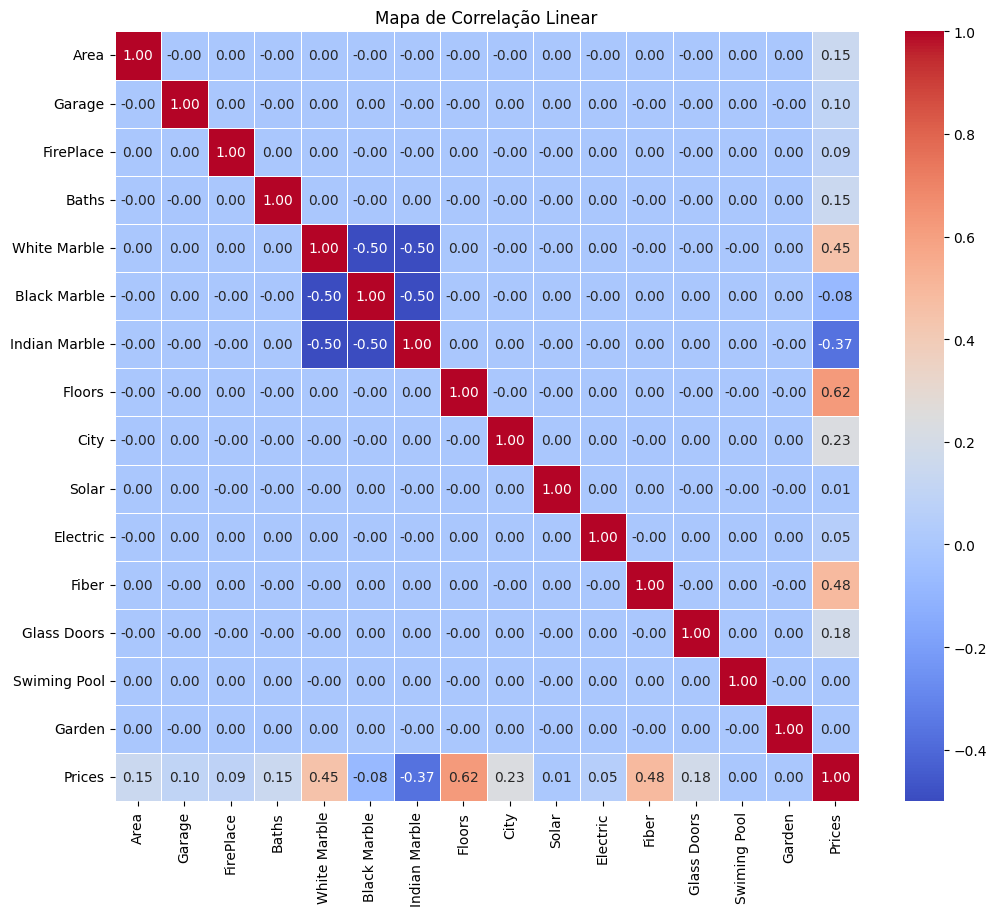

In [6]:
# prompt: # gerar mapa de correlação linear

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlação Linear')
plt.show()

In [15]:
# prompt: # gerar modelo de regressão linear para os Prices

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your pandas DataFrame and 'Price' is the target variable

# Select features and target variable
# For a simple linear regression, let's use a single feature with good correlation
# Based on the correlation matrix, let's pick 'SqFt' as a potential feature
features = ['SqFt'] # Replace with the actual column name for Square Footage if different
target = 'Price'   # Replace with the actual column name for Price if different

# Check if the selected feature and target exist in the DataFrame
if features[0] not in df.columns or target not in df.columns:
    print(f"Error: One or more required columns ('{features[0]}' or '{target}') not found in the DataFrame.")
else:
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Print the model coefficients
    print(f'Intercept: {model.intercept_}')
    print(f'Coefficient for {features[0]}: {model.coef_[0]}')

    # Optional: Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()


Error: One or more required columns ('SqFt' or 'Price') not found in the DataFrame.
